In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


array([38.86338185])

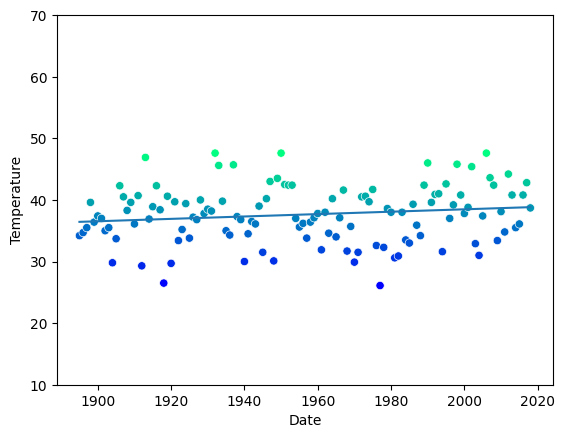

In [9]:
# 15.4 Case Study: Time Series and Simple Linear Regression

# Loading the Average High Temperatures into a DataFrame
import pandas as pd

nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')


nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

# Splitting the Data for Training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

X_train.shape

X_test.shape

# Training the Model
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

linear_regression.coef_

linear_regression.intercept_

# Testing the Model
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

# Predicting Future Temperatures and Estimating Past Temperatures

predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

predict(2019)

predict(1890)

# Visualizing the Dataset with the Regression Line
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

# 15.4 Self Check
# Exercise 3
predict(1889)

predict(2020)



(C) Copyright 2019 by Deitel & Associates, Inc. and                    #
Pearson Education, Inc. All Rights Reserved.                           #
                                                                       #
DISCLAIMER: The authors and publisher of this book have used their     #
best efforts in preparing the book. These efforts include the          #
development, research, and testing of the theories and programs        #
to determine their effectiveness. The authors and publisher make       #
no warranty of any kind, expressed or implied, with regard to these    #
programs or to the documentation contained in these books. The authors #
and publisher shall not be liable in any event for incidental or       #
consequential damages in connection with, or arising out of, the       #
furnishing, performance, or use of these programs.                     #
#########################################################################